In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA 

In [2]:
data=pd.read_csv("/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_history.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4870 non-null   object 
 1   Open          4870 non-null   float64
 2   High          4870 non-null   float64
 3   Low           4870 non-null   float64
 4   Close         4870 non-null   float64
 5   Volume        4870 non-null   int64  
 6   Dividends     4870 non-null   int64  
 7   Stock Splits  4870 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 304.5+ KB


In [4]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Close'>

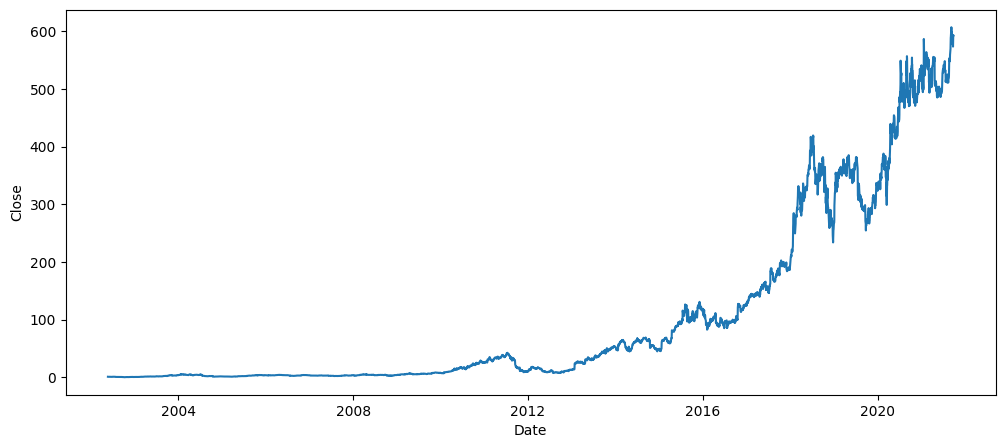

In [5]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data)

# Data Preprocessing

In [6]:
df=data[["Close"]].values

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [9]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range(sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [10]:
sequence_length=10

In [11]:
X,y=create_sequence(scaler_data,sequence_length)

In [12]:
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(X.shape,y.shape)

(4860, 1, 10) (4860,)


# Model

In [13]:
model=Sequential()

In [14]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.add(Dropout(0.2))
model.add(Dense(1))

In [16]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,251 (47.86 KB)

 Trainable params: 12,251 (47.86 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X,y,verbose=1,epochs=100,batch_size=32)

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0291
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 9/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 10/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 11/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 12/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 13/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 14/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 15/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0

# Model Evaluation

In [19]:
loss=model.evaluate(X,y)
print("Model loss :",loss)

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5831e-05
Model loss : 0.0001903449447127059


# Prediction

In [20]:
predictions=model.predict(X)
predictions=scaler.fit_transform(predictions)
print(predictions[:10])

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.00132436]
 [0.00131271]
 [0.00132226]
 [0.0013249 ]
 [0.00129767]
 [0.00126797]
 [0.00118756]
 [0.00109787]
 [0.00101919]
 [0.00099094]]


In [21]:
actual_values=scaler.fit_transform(y.reshape(-1,1))

# Actual Values Vs Predicted Values

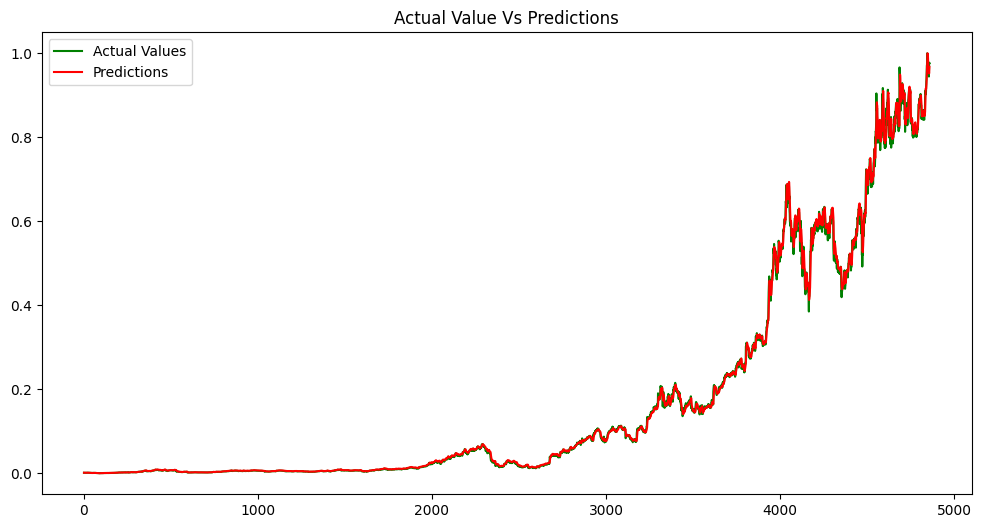

In [22]:
plt.figure(figsize=(12,6))
plt.plot(actual_values,label="Actual Values",color="green")
plt.plot(predictions,label="Predictions",color="red")
plt.legend()
plt.title("Actual Value Vs Predictions")
plt.show()